In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from functools import partial, reduce

#13 weeks data scraping with the beginning date 05/03/2022

df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220305.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220312.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220319.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220326.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220402.txt')
df6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220409.txt')
df7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220416.txt')
df8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220423.txt')
df9 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220430.txt')
df10 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220507.txt')
df11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220514.txt')
df12 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220521.txt')
df13 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220528.txt')
df14 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220326.txt')

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14]

merge = partial(pd.merge, on=['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME', 'DESC','ENTRIES','EXITS                                                               '], how='outer')
mta = reduce(merge, dfs)
mta

    

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530
...,...,...,...,...,...,...,...,...,...,...,...
2739782,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2022,05:00:00,REGULAR,0,382
2739783,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2022,09:00:00,REGULAR,0,382
2739784,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2022,13:00:00,REGULAR,0,383
2739785,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2022,17:00:00,REGULAR,0,386


In [124]:
# View dataframe content
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739787 entries, 0 to 2739786
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [125]:
#Create specific function for adding additional columns to the dataframe
def adding_columns(mta):
    
    # Standardize column name 
    mta.columns = mta.columns.str.strip()
        
    # Create DATETIME column from 'DATE' and 'TIME' cols
    mta['DATETIME'] = pd.to_datetime(mta.DATE + " " + mta.TIME, 
                                    format="%m/%d/%Y %H:%M:%S")
    
    # Create Day of Week column from 'DATETIME'
    mta['DAY'] = mta[['DATETIME']]\
    .apply(lambda x: datetime.datetime.strftime(x['DATETIME'], '%A'), axis=1)
       
    # Drop unnecessary columns
    mta = mta.drop(['LINENAME', 'DIVISION', 'DESC'], axis=1) 

    return mta

In [126]:
#Add new columns
mta_df = adding_columns(mta)
mta_df

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY
0,A002,R051,02-00-00,59 ST,02/26/2022,03:00:00,7689737,2671257,2022-02-26 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,02/26/2022,07:00:00,7689741,2671278,2022-02-26 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,02/26/2022,11:00:00,7689758,2671380,2022-02-26 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,02/26/2022,15:00:00,7689791,2671465,2022-02-26 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,02/26/2022,19:00:00,7689858,2671530,2022-02-26 19:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...
2739782,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2022,05:00:00,0,382,2022-05-27 05:00:00,Friday
2739783,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2022,09:00:00,0,382,2022-05-27 09:00:00,Friday
2739784,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2022,13:00:00,0,383,2022-05-27 13:00:00,Friday
2739785,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2022,17:00:00,0,386,2022-05-27 17:00:00,Friday


In [127]:
# Drop NaNs created by previous cell
print("prior shape: ", mta_df.shape)
mta_df.dropna(how='any', inplace=True)
print("post shape: ", mta_df.shape)

prior shape:  (2739787, 10)
post shape:  (2739787, 10)


In [128]:
# Check for duplicates for a given turnstile for a given datetime
(mta_df
 .groupby(['STATION', 'DATETIME','C/A','UNIT','SCP'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

# Remove duplicates
print("prior shape: ", mta_df.shape)
mta_df.drop_duplicates(subset=["STATION", "DATETIME",'C/A','UNIT','SCP'], inplace=True)
print("post shape: ", mta_df.shape)

prior shape:  (2739787, 10)
post shape:  (2739730, 10)


In [129]:
#Sort values according to the columns
mta_df = mta_df.sort_values(['STATION','DATETIME','C/A', 'UNIT', 'SCP'])
mta_df

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY
32811,H007,R248,00-00-00,1 AV,02/26/2022,03:00:00,15727954,18465387,2022-02-26 03:00:00,Saturday
32853,H007,R248,00-00-01,1 AV,02/26/2022,03:00:00,61544243,38904136,2022-02-26 03:00:00,Saturday
32895,H007,R248,00-03-00,1 AV,02/26/2022,03:00:00,370921555,388286888,2022-02-26 03:00:00,Saturday
32937,H007,R248,00-03-01,1 AV,02/26/2022,03:00:00,2644498,1199867,2022-02-26 03:00:00,Saturday
32979,H007,R248,00-03-02,1 AV,02/26/2022,03:00:00,6725409,584790,2022-02-26 03:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...
2713551,R419,R326,00-00-01,ZEREGA AV,05/27/2022,21:00:00,283094,493623,2022-05-27 21:00:00,Friday
2713593,R419,R326,00-03-00,ZEREGA AV,05/27/2022,21:00:00,1243141,589665,2022-05-27 21:00:00,Friday
2713635,R419,R326,00-03-01,ZEREGA AV,05/27/2022,21:00:00,1437181,294951,2022-05-27 21:00:00,Friday
2713677,R419,R326,00-05-00,ZEREGA AV,05/27/2022,21:00:00,748,0,2022-05-27 21:00:00,Friday


In [130]:
# Create diff columns to take entries/exits for given time interval
mta_df['PERIODIC_ENTRIES'] = mta_df.groupby(['STATION','C/A', 'UNIT', 'SCP'],as_index=False)['ENTRIES'].diff()
mta_df['PERIODIC_EXITS'] = mta_df.groupby(['STATION','C/A', 'UNIT', 'SCP'],as_index=False)['EXITS'].diff()


In [131]:
#Check the periodic exits and entries columns
mta_df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY,PERIODIC_ENTRIES,PERIODIC_EXITS
32811,H007,R248,00-00-00,1 AV,02/26/2022,03:00:00,15727954,18465387,2022-02-26 03:00:00,Saturday,NaN,NaN
32853,H007,R248,00-00-01,1 AV,02/26/2022,03:00:00,61544243,38904136,2022-02-26 03:00:00,Saturday,NaN,NaN
32895,H007,R248,00-03-00,1 AV,02/26/2022,03:00:00,370921555,388286888,2022-02-26 03:00:00,Saturday,NaN,NaN
32937,H007,R248,00-03-01,1 AV,02/26/2022,03:00:00,2644498,1199867,2022-02-26 03:00:00,Saturday,NaN,NaN
32979,H007,R248,00-03-02,1 AV,02/26/2022,03:00:00,6725409,584790,2022-02-26 03:00:00,Saturday,NaN,NaN


In [132]:
# Drop NaNs created by previous groupby().diff()
print("prior shape: ", mta_df.shape)
mta_df.dropna(how='any', inplace=True)
print("post shape: ", mta_df.shape)

prior shape:  (2739730, 12)
post shape:  (2734681, 12)


In [133]:
# ASSUMPTION: All negative actuals for entries and exits will be dropped from dataset since values should be accumulative 
len_entry_diffs = mta_df['PERIODIC_ENTRIES'].shape[0]
len_exit_diffs = mta_df['PERIODIC_EXITS'].shape[0]

negative_entries = mta_df[mta_df['PERIODIC_ENTRIES'] < 0].shape[0] / len_entry_diffs
negative_exits = mta_df[mta_df['PERIODIC_EXITS'] < 0].shape[0] / len_exit_diffs

print('negative_entries: ', negative_entries)
print('negative_exits: ', negative_exits)

# Drop negative values
print("prior shape: ", mta_df.shape)
mta_df = mta_df.loc[ (mta_df['PERIODIC_ENTRIES'] > 0) & (mta_df['PERIODIC_EXITS'] > 0) ]
print("post shape: ", mta_df.shape)

negative_entries:  0.010004091884940145
negative_exits:  0.0059721773764471985
prior shape:  (2734681, 12)
post shape:  (2183099, 12)


In [134]:
# Create Outlier Threshold based on total seconds in a day: Assuming that each sec cannot have more than 1 person doing turnstile
threshold_entry = 60*24*60
threshold_exit = 60*24*60

## Drop outliers
print("prior shape: ", mta_df.shape)
mta_df = mta_df[(mta_df['PERIODIC_ENTRIES'] < threshold_entry) & (mta_df['PERIODIC_EXITS'] < threshold_exit)]
print("post shape: ", mta_df.shape)

prior shape:  (2183099, 12)
post shape:  (2183064, 12)


In [135]:
# Create 'TOTAL_PEOPLE" = exits + entries. This will be our ranking metric

mta_df['TOTAL_PEOPLE'] = mta_df['PERIODIC_ENTRIES'] + mta_df['PERIODIC_EXITS']
print("post shape: ", mta_df.shape)
mta_df.sort_values('TOTAL_PEOPLE', ascending=False).head()

post shape:  (2183064, 13)


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY,PERIODIC_ENTRIES,PERIODIC_EXITS,TOTAL_PEOPLE
2225648,PTH03,R552,00-00-00,JOURNAL SQUARE,05/10/2022,14:58:40,264870,100879,2022-05-10 14:58:40,Tuesday,52250.0,45034.0,97284.0
2229304,PTH07,R550,00-01-08,CITY / BUS,05/11/2022,11:23:53,61874,32464,2022-05-11 11:23:53,Wednesday,61840.0,32305.0,94145.0
2436716,PTH03,R552,00-01-05,JOURNAL SQUARE,05/17/2022,12:37:42,61860,32465,2022-05-17 12:37:42,Tuesday,61610.0,32236.0,93846.0
117363,PTH01,R549,00-00-07,NEWARK HW BMEBE,03/04/2022,11:22:20,61877,32456,2022-03-04 11:22:20,Friday,58976.0,32293.0,91269.0
2445625,PTH20,R549,03-01-08,NEWARK HM HE,05/20/2022,08:43:26,62253,81471,2022-05-20 08:43:26,Friday,50874.0,26408.0,77282.0


In [136]:
# Force time intervals to 4-hour frequency
def conditions(s):
    if (s[0:2] == '00') or (s[0:2] == '01') or (s[0:2] == '02') or (s[0:2] == '03'):
        return '00:00 - 04:00'
    elif (s[0:2] == '04') or (s[0:2] == '05') or (s[0:2] == '06') or (s[0:2] == '07'):
        return '04:00 - 08:00'
    elif (s[0:2] == '08') or (s[0:2] == '09') or (s[0:2] == '10') or (s[0:2] == '11'):
        return '08:00 - 12:00'
    elif (s[0:2] == '12') or (s[0:2] == '13') or (s[0:2] == '14') or (s[0:2] == '15'):
        return '12:00 - 16:00'
    elif (s[0:2] == '16') or (s[0:2] == '17') or (s[0:2] == '18') or (s[0:2] == '19'):
        return '16:00 - 20:00'
    elif (s[0:2] == '20') or (s[0:2] == '21') or (s[0:2] == '22') or (s[0:2] == '23'):
        return '20:00 - 00:00'
    else:
        return 0
mta_df['TIME_INTERVAL'] = mta_df['TIME'].apply(conditions)

In [137]:
#Drop unnecessary columns
mta_df = mta_df.drop(['C/A','UNIT', 'SCP','ENTRIES', 'EXITS', 'PERIODIC_ENTRIES', 'PERIODIC_EXITS','TIME'], axis=1) 
mta_df

,STATION,DATE,DATETIME,DAY,TOTAL_PEOPLE,TIME_INTERVAL
33391,1 AV,02/26/2022,2022-02-26 07:00:00,Saturday,4.0,04:00 - 08:00
33432,1 AV,02/26/2022,2022-02-26 07:00:00,Saturday,5.0,04:00 - 08:00
33722,1 AV,02/26/2022,2022-02-26 07:00:00,Saturday,3.0,04:00 - 08:00
33351,1 AV,02/26/2022,2022-02-26 11:00:00,Saturday,19.0,08:00 - 12:00
33474,1 AV,02/26/2022,2022-02-26 11:00:00,Saturday,15.0,08:00 - 12:00
...,...,...,...,...,...,...
2713634,ZEREGA AV,05/27/2022,2022-05-27 17:00:00,Friday,196.0,16:00 - 20:00
2713509,ZEREGA AV,05/27/2022,2022-05-27 21:00:00,Friday,260.0,20:00 - 00:00
2713551,ZEREGA AV,05/27/2022,2022-05-27 21:00:00,Friday,126.0,20:00 - 00:00
2713593,ZEREGA AV,05/27/2022,2022-05-27 21:00:00,Friday,83.0,20:00 - 00:00


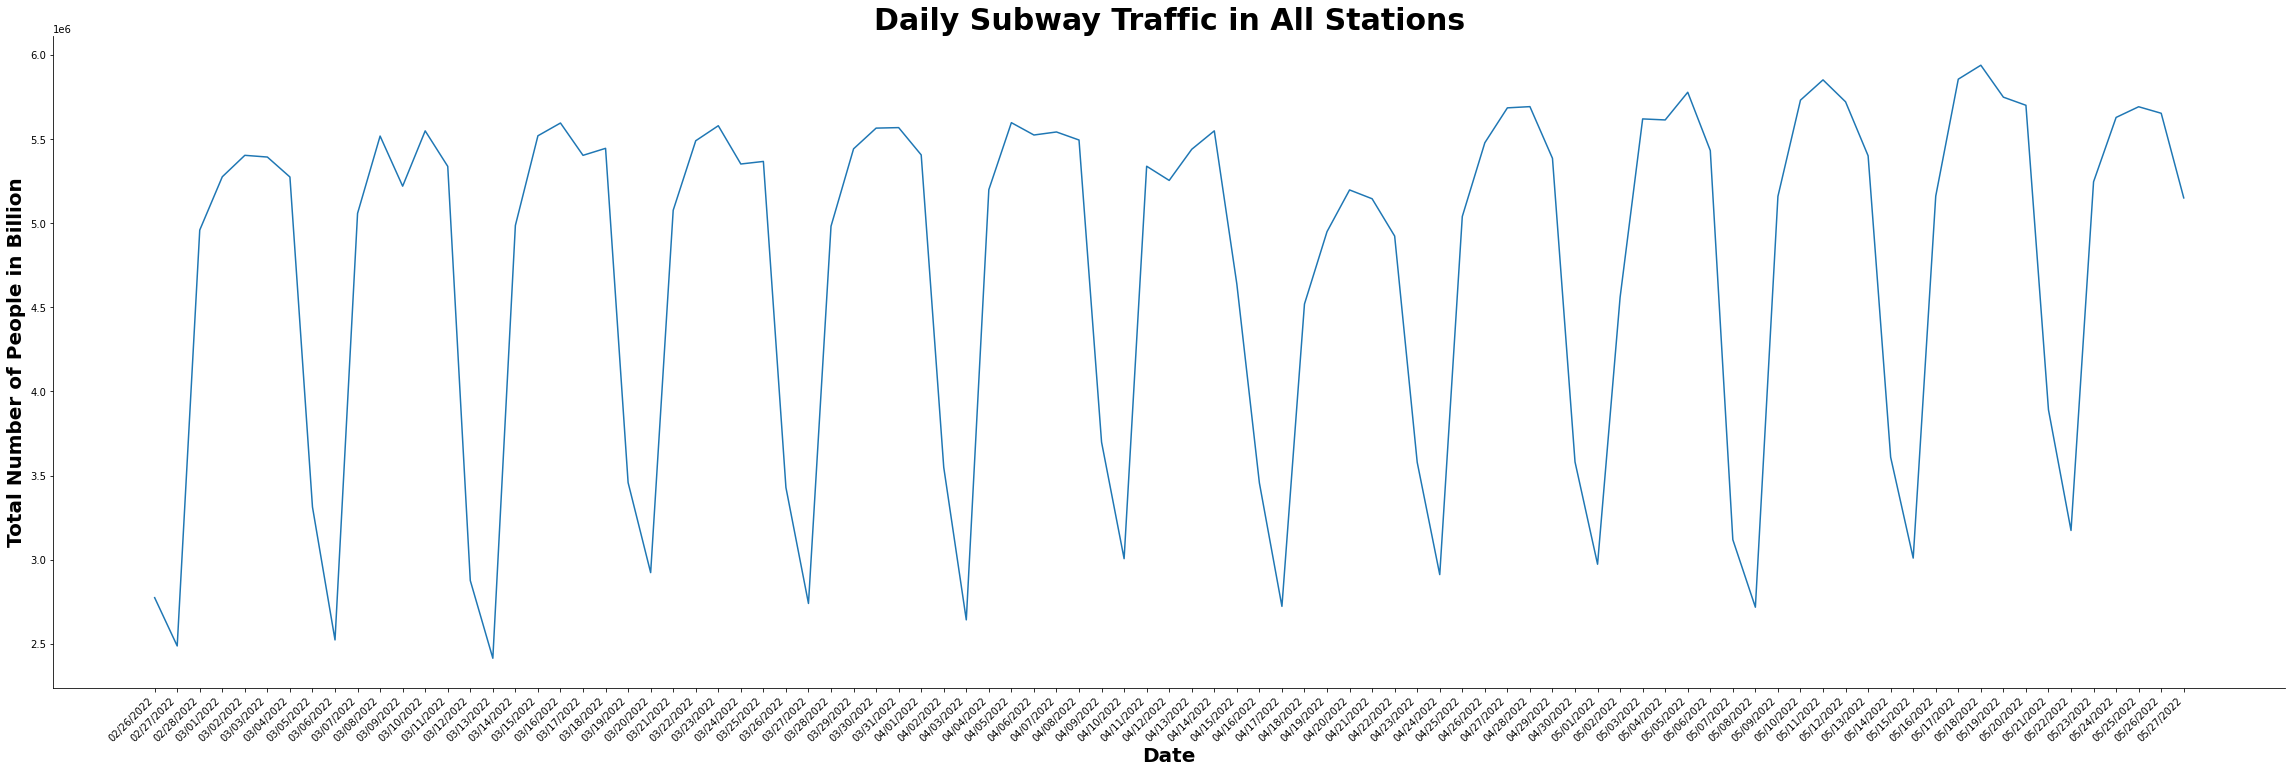

In [138]:
#Date Based Analysis
date_based_analysis = mta_df.groupby(['DATE'])[['TOTAL_PEOPLE']].sum().copy()


plt.figure(figsize=[40,12])
plt.plot(date_based_analysis)
plt.title('Daily Subway Traffic in All Stations',weight='bold',fontsize=30)
plt.xlabel('Date',weight='bold',fontsize=20)
plt.ylabel('Total Number of People in Billion',weight='bold',fontsize=20)
plt.xticks(rotation=45,ha='right')
sns.despine()

In [139]:
#Top 10 Stations
top_stations = mta_df.groupby(['STATION'])[['TOTAL_PEOPLE']].sum().sort_values(by='TOTAL_PEOPLE',ascending = False).head(10)
top_stations = pd.DataFrame(top_stations.reset_index())
top_stations

,STATION,TOTAL_PEOPLE
0,34 ST-PENN STA,11580731.0
1,GRD CNTRL-42 ST,9308056.0
2,34 ST-HERALD SQ,8466281.0
3,14 ST-UNION SQ,7609302.0
4,86 ST,7559339.0
5,23 ST,7398517.0
6,TIMES SQ-42 ST,7166029.0
7,42 ST-PORT AUTH,6840406.0
8,FULTON ST,6460464.0
9,125 ST,6399865.0


# Data Visualization

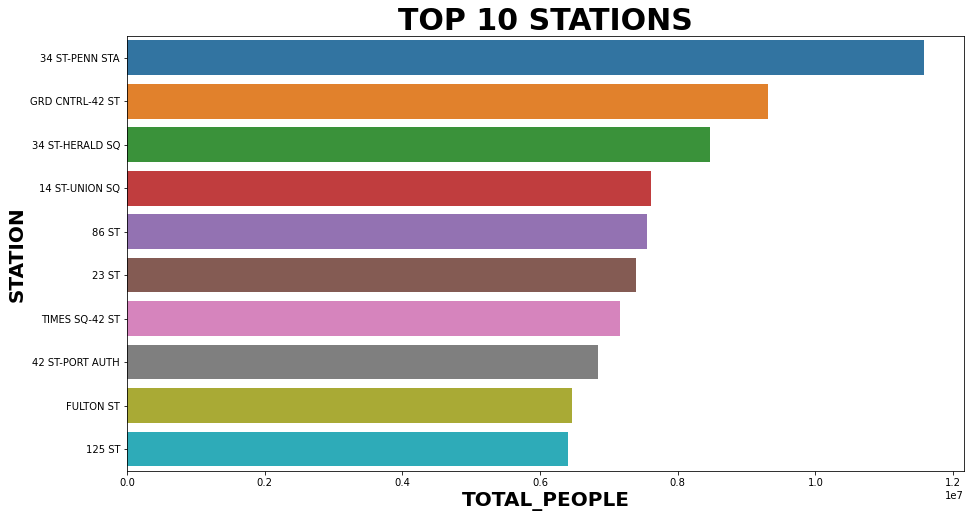

In [140]:
#Plot graph for TOP 10 STATIONS
plt.figure(figsize=(15,8))
plt.title('TOP 10 STATIONS',fontsize = 30,loc='CENTER',color='black',weight='bold');
plt.xlabel('Traffic',weight='bold',fontsize=20)
plt.ylabel('Station',weight='bold',fontsize=20)
sns.barplot(data = top_stations, y = top_stations.STATION, x = top_stations.TOTAL_PEOPLE)
plt.show()

In [141]:
#Focus on Day of Week 
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mta_days = mta_df.groupby(['DAY'])['TOTAL_PEOPLE'].sum().reset_index()
mta_days['DAY'] = pd.Categorical(mta_days['DAY'], categories=cats, ordered=True)
mta_days = mta_days.sort_values('DAY')
mta_days

,DAY,TOTAL_PEOPLE
1,Monday,65278303.0
5,Tuesday,71350035.0
6,Wednesday,72295698.0
4,Thursday,72085509.0
0,Friday,68945556.0
2,Saturday,44331040.0
3,Sunday,36243129.0


Text(0.5, 1.0, 'Time Interval Analysis')

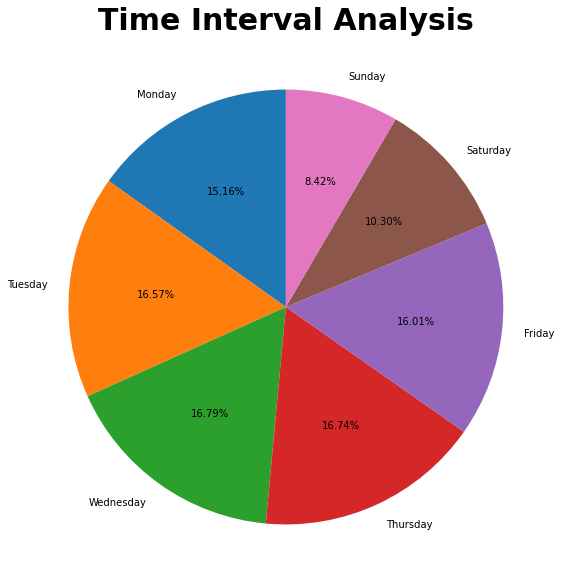

In [142]:
#Pie chart to determine top days
plt.figure(figsize=[10,10])
plt.pie(mta_days.TOTAL_PEOPLE,labels=mta_days.DAY,autopct='%1.2f%%',startangle=90)
plt.title("Time Interval Analysis",weight='bold',fontsize=30)

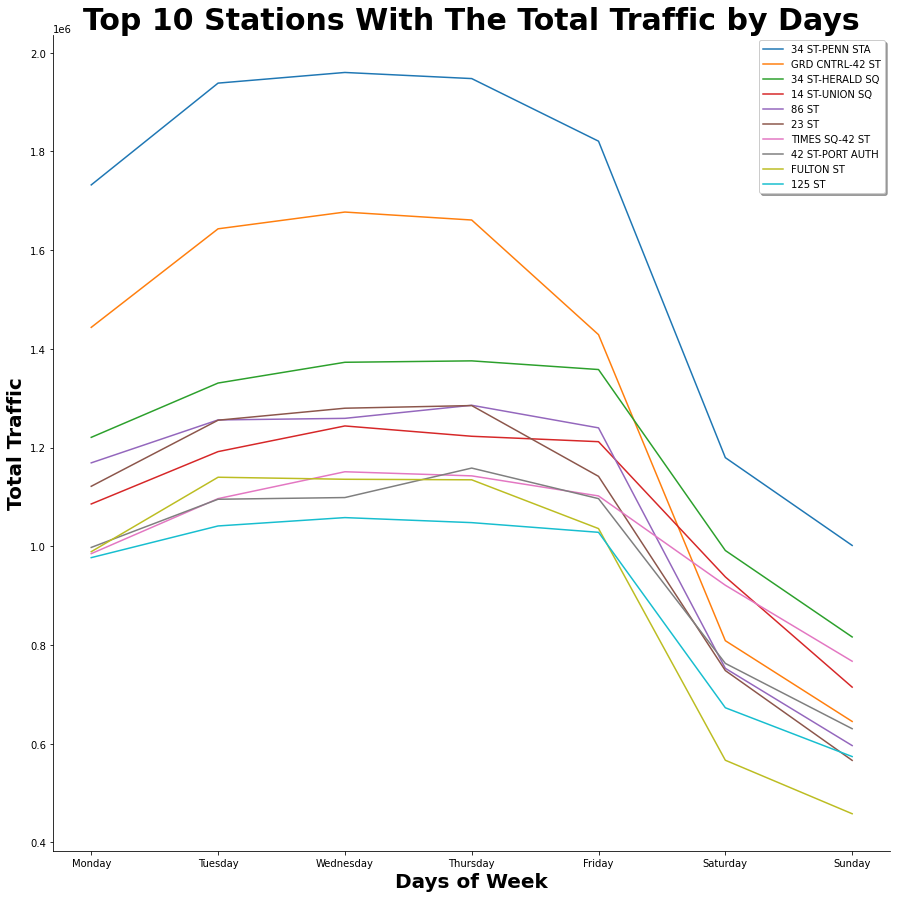

In [143]:
#Analyze top 10 stations' daily traffic

#Gather and sort the values according to the days
def day_identifier(x):
    if x == 'Monday':
        return 1
    elif x == 'Tuesday':
        return 2
    elif x == 'Wednesday':
        return 3
    elif x == 'Thursday':
        return 4
    elif x == 'Friday':
        return 5
    elif x == 'Saturday':
        return 6
    elif x == 'Sunday':
        return 7

stpenn_by_days = mta_df[mta_df.STATION == '34 ST-PENN STA'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()    
stpenn_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
stpenn_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
stpenn_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

grdcntrl_by_days = mta_df[mta_df.STATION == 'GRD CNTRL-42 ST'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
grdcntrl_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
grdcntrl_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
grdcntrl_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True)

stherald34_by_days = mta_df[mta_df.STATION == '34 ST-HERALD SQ'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
stherald34_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
stherald34_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
stherald34_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

stunion14_by_days = mta_df[mta_df.STATION == '14 ST-UNION SQ'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
stunion14_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
stunion14_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
stunion14_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

st86_by_days = mta_df[mta_df.STATION == '86 ST'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
st86_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
st86_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
st86_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

st23_by_days = mta_df[mta_df.STATION == '23 ST'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
st23_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
st23_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
st23_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

sq42st_by_days = mta_df[mta_df.STATION == 'TIMES SQ-42 ST'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
sq42st_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
sq42st_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
sq42st_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

stport42_by_days = mta_df[mta_df.STATION == '42 ST-PORT AUTH'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
stport42_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
stport42_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
stport42_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

fulton_by_days = mta_df[mta_df.STATION == 'FULTON ST'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
fulton_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
fulton_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
fulton_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

st125_by_days = mta_df[mta_df.STATION == '125 ST'].groupby(['DAY'])[['TOTAL_PEOPLE']].sum().copy()
st125_by_days['DAY_IDENTIFIER'] = stpenn_by_days.index.to_series().apply(day_identifier)
st125_by_days.sort_values(by='DAY_IDENTIFIER',inplace=True)
st125_by_days.drop(['DAY_IDENTIFIER'], axis=1,inplace=True) 

#Implement to plot
plt.figure(figsize=[15,15])
plt.plot(stpenn_by_days)
plt.plot(grdcntrl_by_days)
plt.plot(stherald34_by_days)
plt.plot(stunion14_by_days)
plt.plot(st86_by_days)
plt.plot(st23_by_days)
plt.plot(sq42st_by_days)
plt.plot(stport42_by_days)
plt.plot(fulton_by_days)
plt.plot(st125_by_days)

#Plot configurations
plt.title('Top 10 Stations With The Total Traffic by Days', weight = 'bold',fontsize=30)
plt.xlabel('Days of Week',weight='bold',fontsize=20)
plt.ylabel('Total Traffic',weight='bold',fontsize=20)
plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','34 ST-HERALD SQ','14 ST-UNION SQ','86 ST','23 ST','TIMES SQ-42 ST','42 ST-PORT AUTH','FULTON ST','125 ST'],shadow=True)
sns.despine()

Text(114.0, 0.5, 'Stations')

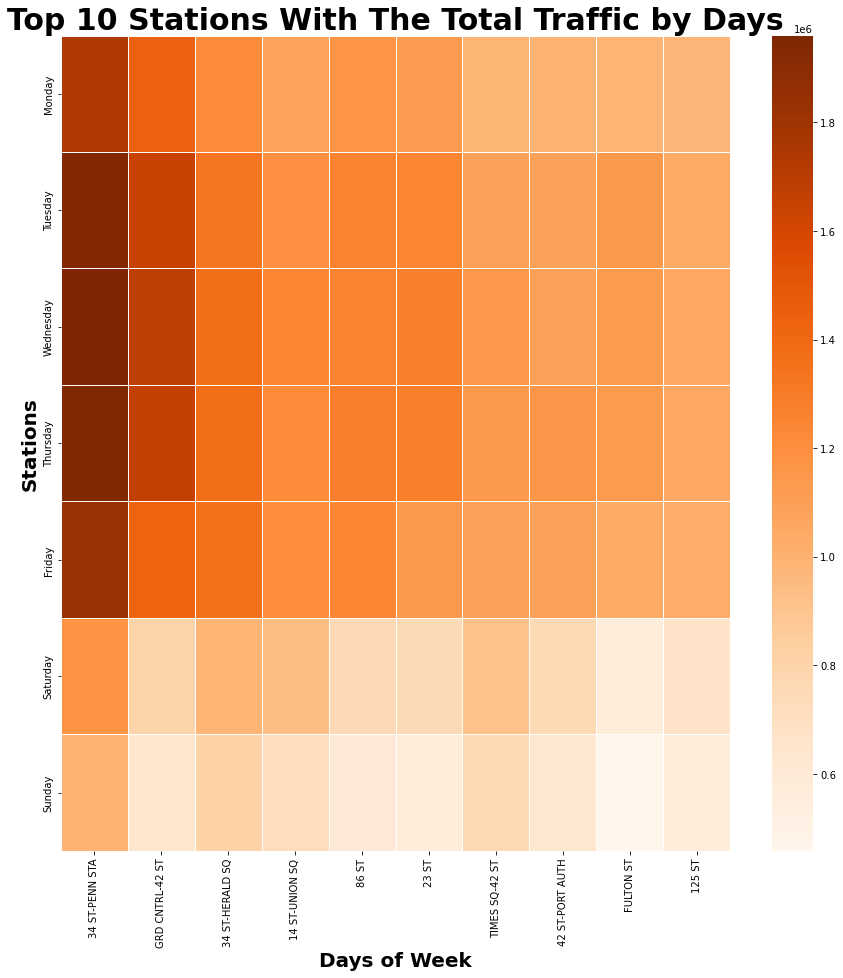

In [144]:
#Create heatmap for daily traffic of top stations

stpenn_by_days.rename(columns={'TOTAL_PEOPLE': '34 ST-PENN STA'},inplace=True)
grdcntrl_by_days.rename(columns={'TOTAL_PEOPLE': 'GRD CNTRL-42 ST'},inplace=True)
stherald34_by_days.rename(columns={'TOTAL_PEOPLE': '34 ST-HERALD SQ'},inplace=True)
stunion14_by_days.rename(columns={'TOTAL_PEOPLE': '14 ST-UNION SQ'},inplace=True)
st86_by_days.rename(columns={'TOTAL_PEOPLE': '86 ST'},inplace=True)
st23_by_days.rename(columns={'TOTAL_PEOPLE': '23 ST'},inplace=True)
sq42st_by_days.rename(columns={'TOTAL_PEOPLE': 'TIMES SQ-42 ST'},inplace=True)
stport42_by_days.rename(columns={'TOTAL_PEOPLE': '42 ST-PORT AUTH'},inplace=True)
fulton_by_days.rename(columns={'TOTAL_PEOPLE': 'FULTON ST'},inplace=True)
st125_by_days.rename(columns={'TOTAL_PEOPLE': '125 ST'},inplace=True)

top_stations_by_days = pd.merge(stpenn_by_days, grdcntrl_by_days, left_index=True, right_index=True)
top_stations_by_days = pd.merge(top_stations_by_days, stherald34_by_days, left_index=True, right_index=True)
top_stations_by_days = pd.merge(top_stations_by_days, stunion14_by_days, left_index=True, right_index=True)
top_stations_by_days = pd.merge(top_stations_by_days, st86_by_days, left_index=True, right_index=True)
top_stations_by_days = pd.merge(top_stations_by_days, st23_by_days, left_index=True, right_index=True)
top_stations_by_days = pd.merge(top_stations_by_days, sq42st_by_days, left_index=True, right_index=True)
top_stations_by_days = pd.merge(top_stations_by_days, stport42_by_days, left_index=True, right_index=True)
top_stations_by_days = pd.merge(top_stations_by_days, fulton_by_days, left_index=True, right_index=True)
top_stations_by_days = pd.merge(top_stations_by_days, st125_by_days, left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(top_stations_by_days,cmap='Oranges',annot=False, linewidths=.5, ax=ax)
plt.title('Top 10 Stations With The Total Traffic by Days', weight = 'bold',fontsize=30)
plt.xlabel('Days of Week',weight='bold',fontsize=20)
plt.ylabel('Stations',weight='bold',fontsize=20)

Text(114.0, 0.5, 'Time Intervals')

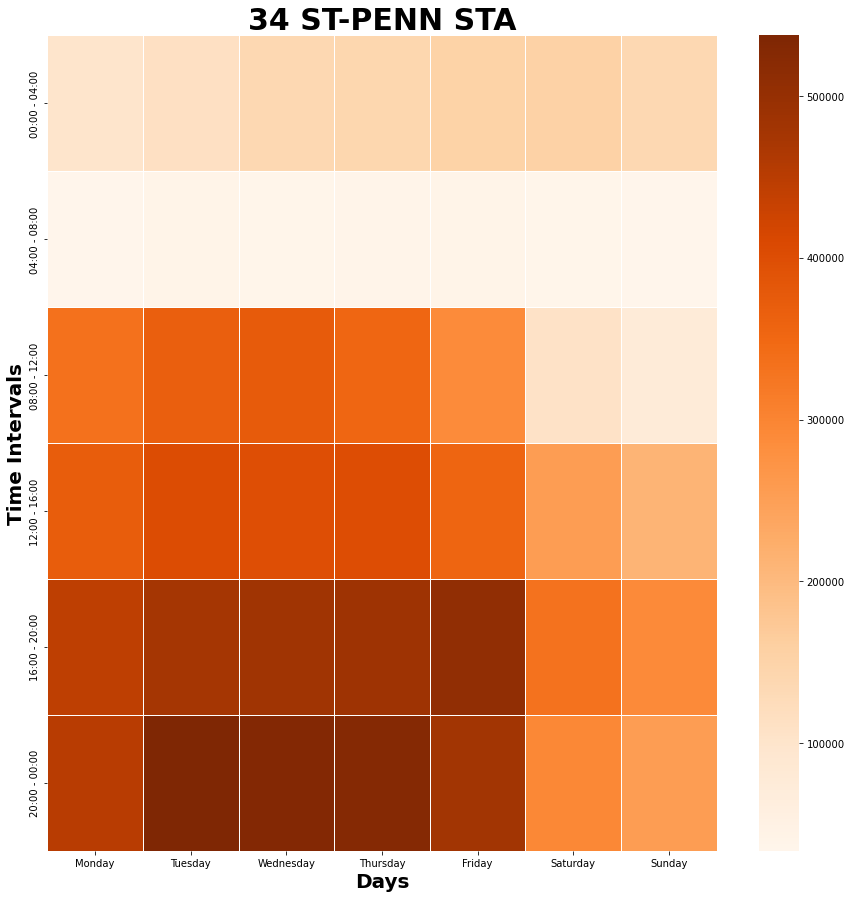

In [145]:
#Create heatmap for weekl time interval of the top station

monday_time_interval= mta_df[(mta_df.DAY == 'Monday') & (mta_df.STATION == '34 ST-PENN STA')].groupby(['TIME_INTERVAL'])[['TOTAL_PEOPLE']].sum().copy()
tuesday_time_interval= mta_df[(mta_df.DAY == 'Tuesday') & (mta_df.STATION == '34 ST-PENN STA')].groupby(['TIME_INTERVAL'])[['TOTAL_PEOPLE']].sum().copy()
wednesday_time_interval= mta_df[(mta_df.DAY == 'Wednesday') & (mta_df.STATION == '34 ST-PENN STA')].groupby(['TIME_INTERVAL'])[['TOTAL_PEOPLE']].sum().copy()
thursday_time_interval= mta_df[(mta_df.DAY == 'Thursday') & (mta_df.STATION == '34 ST-PENN STA')].groupby(['TIME_INTERVAL'])[['TOTAL_PEOPLE']].sum().copy()
friday_time_interval= mta_df[(mta_df.DAY == 'Friday') & (mta_df.STATION == '34 ST-PENN STA')].groupby(['TIME_INTERVAL'])[['TOTAL_PEOPLE']].sum().copy()
saturday_time_interval= mta_df[(mta_df.DAY == 'Saturday') & (mta_df.STATION == '34 ST-PENN STA')].groupby(['TIME_INTERVAL'])[['TOTAL_PEOPLE']].sum().copy()
sunday_time_interval= mta_df[(mta_df.DAY == 'Sunday') & (mta_df.STATION == '34 ST-PENN STA')].groupby(['TIME_INTERVAL'])[['TOTAL_PEOPLE']].sum().copy()

monday_time_interval.rename(columns={'TOTAL_PEOPLE': 'Monday'},inplace=True)
tuesday_time_interval.rename(columns={'TOTAL_PEOPLE': 'Tuesday'},inplace=True)
wednesday_time_interval.rename(columns={'TOTAL_PEOPLE': 'Wednesday'},inplace=True)
thursday_time_interval.rename(columns={'TOTAL_PEOPLE': 'Thursday'},inplace=True)
friday_time_interval.rename(columns={'TOTAL_PEOPLE': 'Friday'},inplace=True)
saturday_time_interval.rename(columns={'TOTAL_PEOPLE': 'Saturday'},inplace=True)
sunday_time_interval.rename(columns={'TOTAL_PEOPLE': 'Sunday'},inplace=True)

daily_time_interval = pd.merge(monday_time_interval, tuesday_time_interval, left_index=True, right_index=True)
daily_time_interval = pd.merge(daily_time_interval, wednesday_time_interval, left_index=True, right_index=True)
daily_time_interval = pd.merge(daily_time_interval, thursday_time_interval, left_index=True, right_index=True)
daily_time_interval = pd.merge(daily_time_interval, friday_time_interval, left_index=True, right_index=True)
daily_time_interval = pd.merge(daily_time_interval, saturday_time_interval, left_index=True, right_index=True)
daily_time_interval = pd.merge(daily_time_interval, sunday_time_interval, left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(daily_time_interval,cmap='Oranges',annot=False, linewidths=.5, ax=ax)
plt.title('34 ST-PENN STA', weight = 'bold',fontsize=30)
plt.xlabel('Days',weight='bold',fontsize=20)
plt.ylabel('Time Intervals',weight='bold',fontsize=20)